In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [28]:
data = pd.read_csv('Housing.csv')

In [29]:
df = pd.DataFrame(data)

In [53]:
df.shape

(545, 13)

In [54]:
print("Общая информация о данных:")
print(df.info())

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [55]:
data.keys()

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [56]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [64]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [65]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [66]:
print("\nСтатистика по ценам: ")
print(df['price'].describe())


Статистика по ценам: 
count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64


In [67]:
grouped_by_district = df.groupby('area')['price']
print("\nСтатистика по ценам по площади:")
print(grouped_by_district.describe())


Статистика по ценам по площади:
       count        mean           std         min         25%         50%  \
area                                                                         
1650     1.0   3150000.0           NaN   3150000.0   3150000.0   3150000.0   
1700     1.0   1890000.0           NaN   1890000.0   1890000.0   1890000.0   
1836     1.0   2275000.0           NaN   2275000.0   2275000.0   2275000.0   
1905     1.0   4340000.0           NaN   4340000.0   4340000.0   4340000.0   
1950     2.0   2835000.0  8.414571e+05   2240000.0   2537500.0   2835000.0   
...      ...         ...           ...         ...         ...         ...   
12900    1.0   4900000.0           NaN   4900000.0   4900000.0   4900000.0   
12944    1.0   3500000.0           NaN   3500000.0   3500000.0   3500000.0   
13200    2.0   8365000.0  2.029396e+06   6930000.0   7647500.0   8365000.0   
15600    1.0   5943000.0           NaN   5943000.0   5943000.0   5943000.0   
16200    1.0  10150000.0       

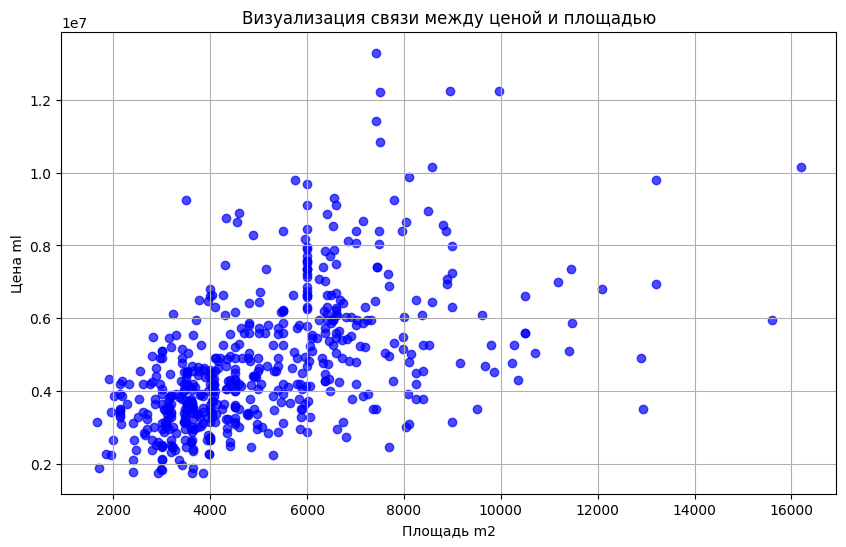

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], c='blue', alpha=0.7)
plt.title('Визуализация связи между ценой и площадью')
plt.xlabel('Площадь m2')
plt.ylabel('Цена ml')
plt.grid(True)
plt.show()

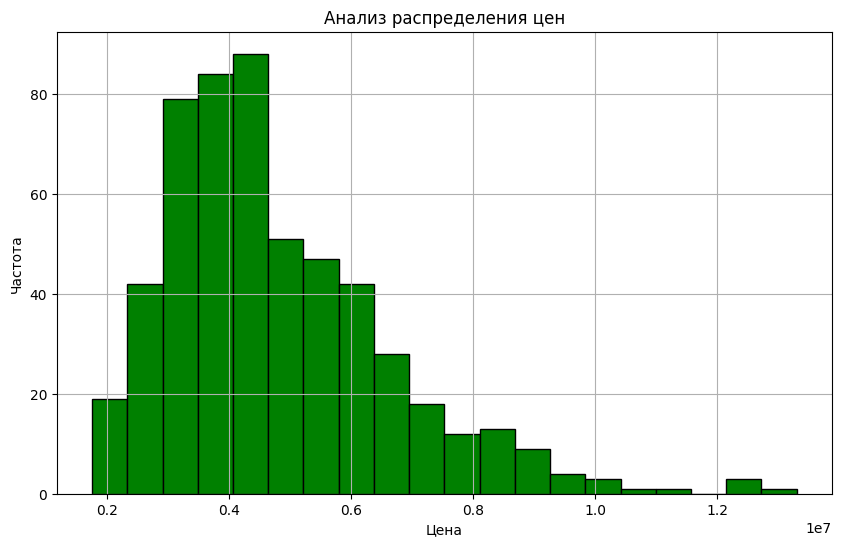

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='green', edgecolor='black')
plt.title('Анализ распределения цен')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()
# По оси x отложены интервалы цен, а по оси y - частота, с которой цены встречаются в каждом интервале.

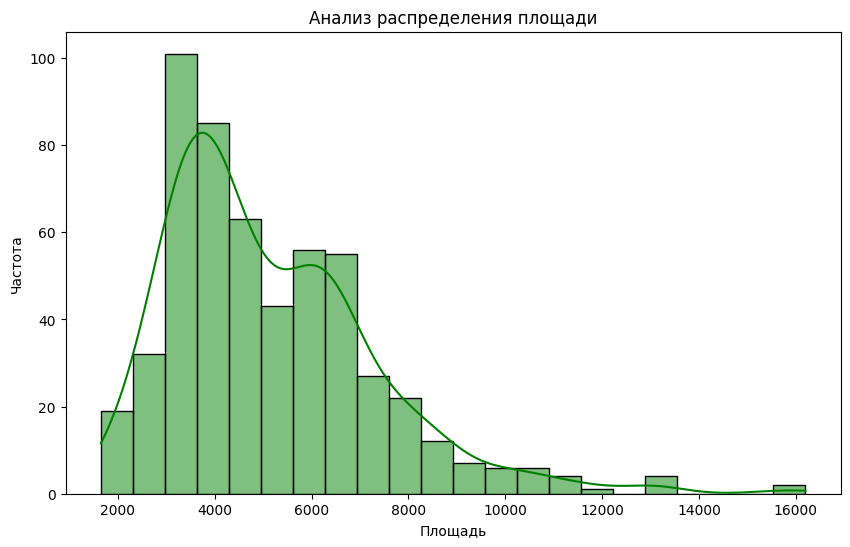

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], kde=True, color='green',edgecolor='black')
plt.title('Анализ распределения площади')
plt.xlabel('Площадь')
plt.ylabel('Частота')
plt.show()


C:\Users\Aiana Sagynbek\AppData\Local\Temp\ipykernel_9584\3567358504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df, palette='viridis')


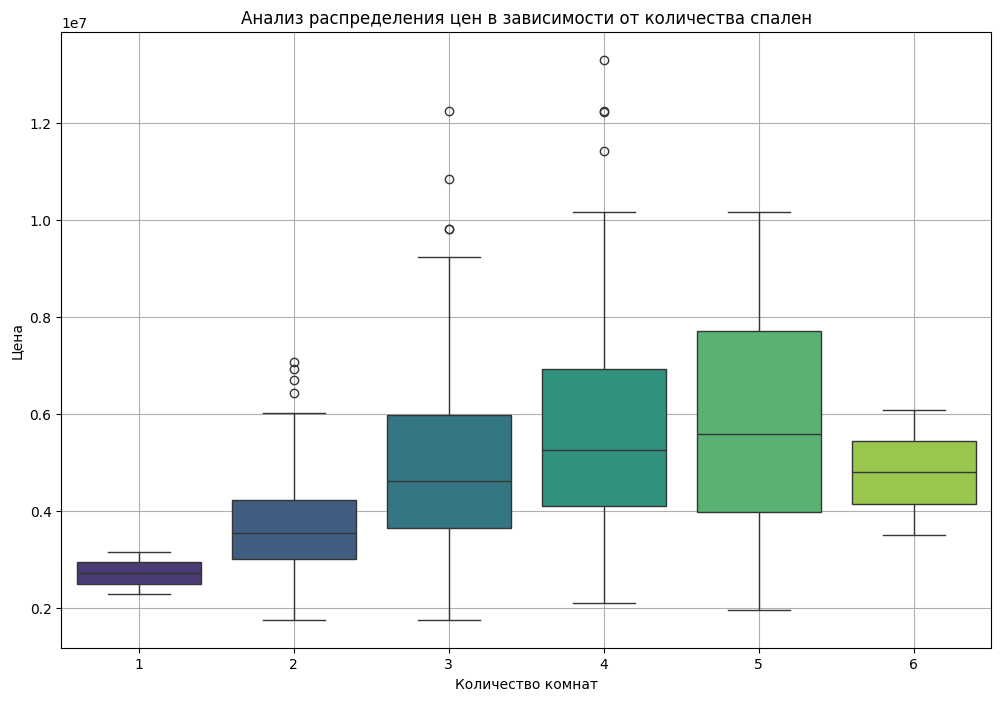

In [74]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='bedrooms', y='price', data=df, palette='viridis')
plt.title('Анализ распределения цен в зависимости от количества спален')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

In [71]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


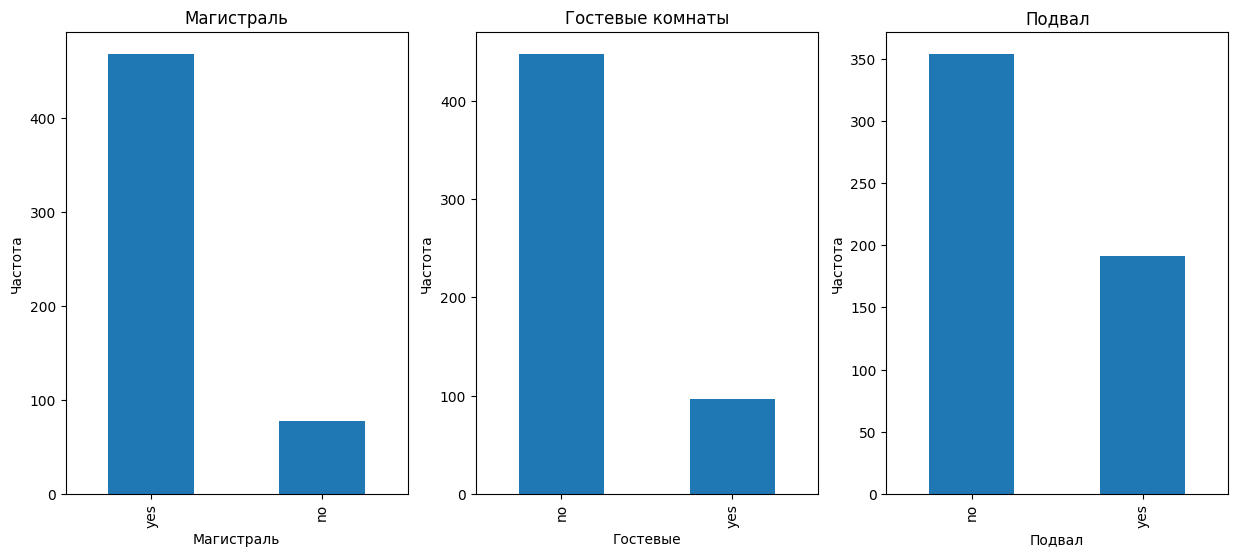

In [78]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('Магистраль')
plt1.set(xlabel = 'Магистраль', ylabel='Частота')

plt.subplot(1,3,2)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('Гостевые комнаты')
plt1.set(xlabel = 'Гостевые', ylabel='Частота')

plt.subplot(1,3,3)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('Подвал')
plt1.set(xlabel = 'Подвал', ylabel='Частота')

plt.show()

In [79]:
numerical = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


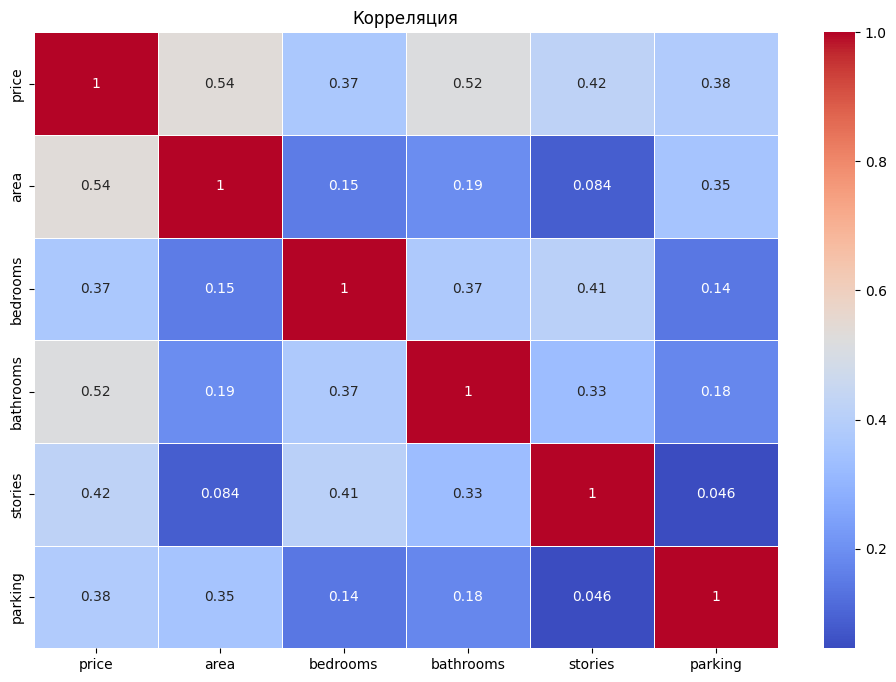

In [86]:
cor_matrix= df[numerical].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция')
plt.show()

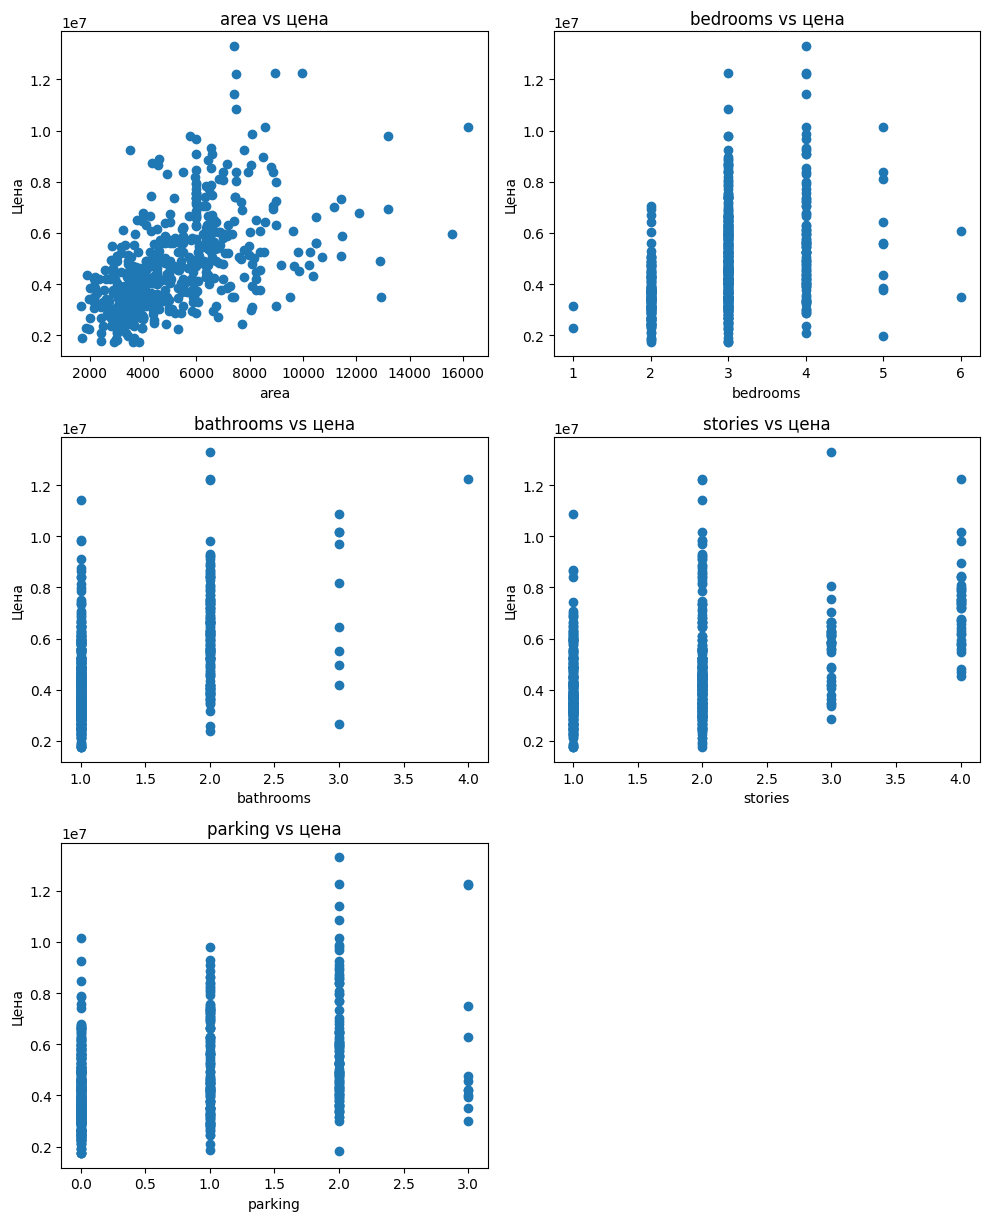

In [83]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs цена')
    plt.ylabel('Цена')
    plt.xlabel(x)

plt.figure(figsize=(10,20))
scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

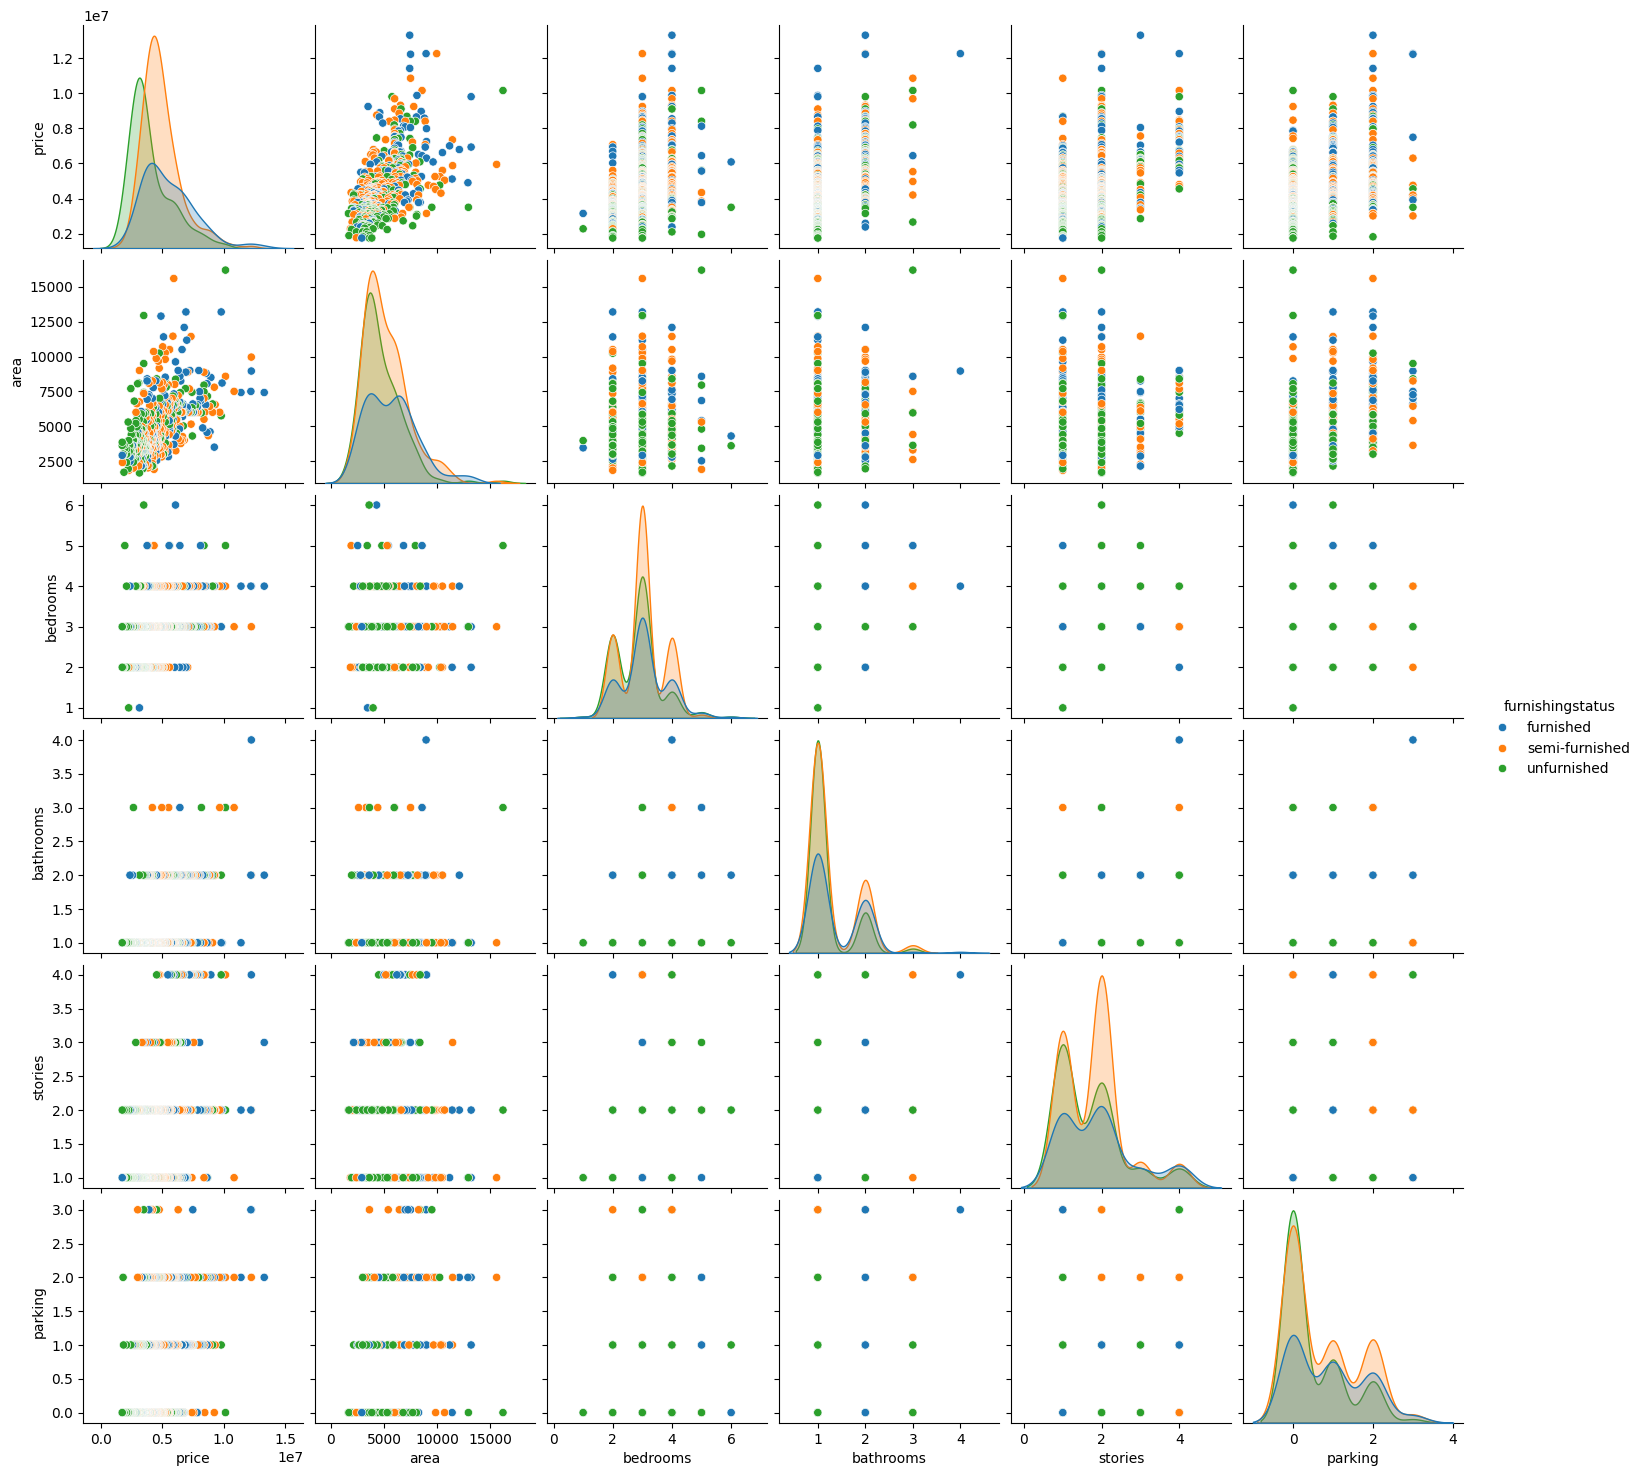

In [88]:
sns.pairplot(df,hue="furnishingstatus")

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

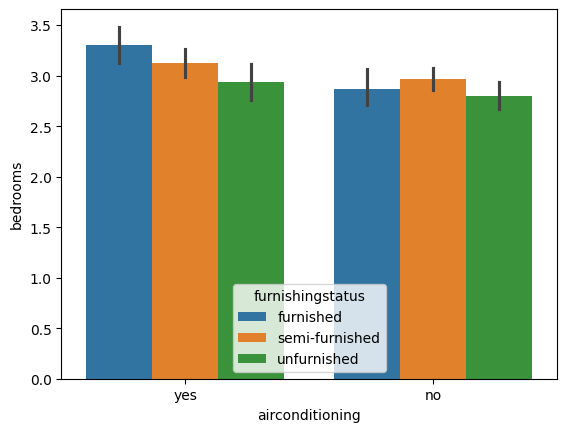

In [87]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

In [92]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)    

In [93]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
126,7160,3,1,1,yes,no,yes,no,no,2,yes,unfurnished
363,3584,2,1,1,yes,no,no,yes,no,0,no,semi-furnished
370,4280,2,1,1,yes,no,no,no,yes,2,no,semi-furnished
31,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
113,9620,3,1,1,yes,no,yes,no,no,2,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished
106,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
270,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
435,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [94]:
y_train

126    5880000
363    3710000
370    3640000
31     8400000
113    6083000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 381, dtype: int64

In [97]:
data["bedrooms"].unique()

array([4, 3, 5, 2, 6, 1], dtype=int64)

In [98]:
data["bathrooms"].unique()

array([2, 4, 1, 3], dtype=int64)

In [99]:
data["mainroad"].unique()

array(['yes', 'no'], dtype=object)

In [100]:
data["guestroom"].unique()

array(['no', 'yes'], dtype=object)

In [101]:
data["basement"].unique()

array(['no', 'yes'], dtype=object)

In [102]:
data["parking"].unique()

array([2, 3, 0, 1], dtype=int64)

In [103]:
data["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

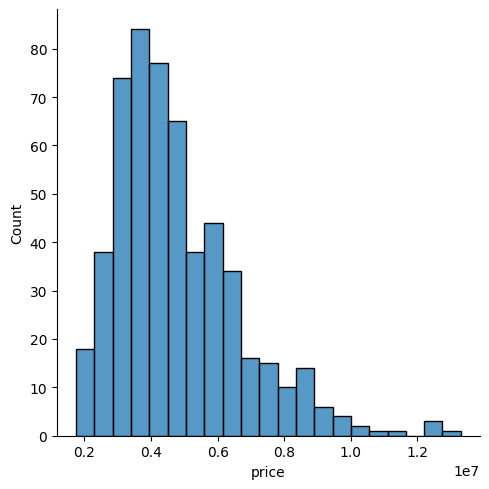

In [104]:
sns.displot(data["price"])
plt.show()

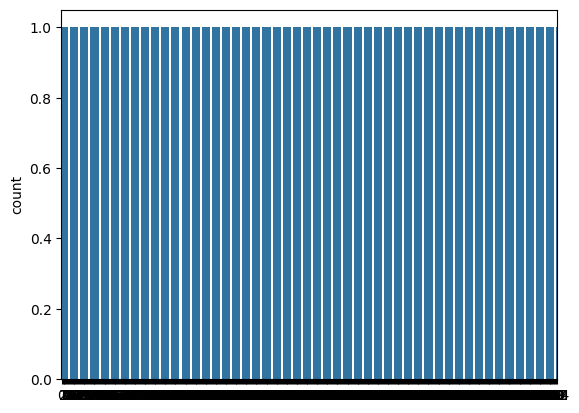

In [105]:
sns.countplot(data['bedrooms'])
plt.show()